# Overfitting and Underfitting

## The Variance-Bias Trade off

When we say a model overfits, we say it has high variance. So what is it exactly that varies? At the same time, we say that a model underfits also high bias. So what is exactly that has high bias? Additionally, the same is true in reverse. If we have low-bias, we say the model overfits and if we have low-variance, we say that the model underfits.

![variance_bias_visual](../../assets/7-model-selection-and-evaluation/introduction/variance_bias_visual.png)

The reason why I found it confusing is because of the choice in terminology. Both underfitting and overfitting simulatenously imply good and bad things.

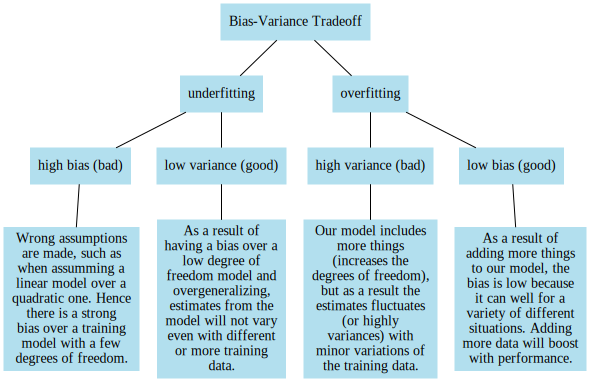

In [5]:
from graphviz import Graph
from textwrap import wrap


def w(text, width=20):
    return '\n'.join(wrap(text, width))


g = Graph('G')

g.attr('node', shape='box')
g.node_attr.update(color='lightblue2', style='filled')
g.edge('Bias-Variance Tradeoff', 'underfitting')
g.edge('Bias-Variance Tradeoff', 'overfitting')

g.edge('overfitting', 'high variance (bad)')
g.edge('overfitting', 'low bias (good)')

g.edge('underfitting', 'high bias (bad)')
g.edge('underfitting', 'low variance (good)')

A = w('Wrong assumptions are made, such as when assumming a linear model over a quadratic one. Hence there is a strong bias over a training model with a few degrees of freedom.')
g.edge('high bias (bad)', A)
B = w('As a result of having a bias over a low degree of freedom model and overgeneralizing, estimates from the model will not vary even with different or more training data.')
g.edge('low variance (good)', B)

C = w('Our model includes more things (increases the degrees of freedom), but as a result the estimates fluctuates (or highly variances) with minor variations of the training data.')
g.edge('high variance (bad)', C)
D = w('As a result of adding more things to our model, the bias is low because it can well for a variety of different situations. Adding more data will boost with performance.')
g.edge('low bias (good)', D)
g

The trade here is that, the more things we add, the more things will tend to vary, and the more things we take away, the more likely we will have more bias towards a particular one thing.


The thing to understand is that bias and variance is not specific to a particular dataset. Rather, we talk about variance and bias when we look at average performance across possible training sets. With bias, we refer to it as the degree to which the predictions are wrong on average across all possible training sets. For example, given a training set `X`, you can train your model different ways depending on how the data is split. However, no matter how which you choose, your predictions will be off. This is the bias you get as a result of underfitting to the data.

On the other hand, a model can be polynomial, and very specifically fit to the training set. As a result, the predicitions vary greatly as a result when we compare across training set to training set. For example, I could fit a polynomial model, and measure its performance  across several different training sets. If my model was overfitted, then one thing I should expect is to see is that I am sometimes more wrong than other times, because some training sets I happen to memorize, and other times I have no idea what to no which it because I expect to see it in a particular way.

The reason why this trade off fundamentally exists is because any model needs to simulatenously minimize both sources of error that in nature coexist together. In other wordss, both errors cannot be minimized together, but rather a threshold can found between the two spectrums that minimizes both errors at the same time.


In summary
 
> * The bias is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). A model underfits with both the training and validation set have high error.
> * The variance is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). A model overfits when the training set has low error but the validation set has high error.



## Understanding the Learning Curve

To evaluate the bias and variance trade off in a model, a **learning curve** is introduced. In the learning curve, the cross-validated training _and_ testing scores are measured against varying training size. With a learning curve, we are able to identify or not an estimator could benefit a larger or smaller training size. The learning curve also helps us identify whether the estimator suffers more from variance or bias error (overfitting and underfitting).

Most learning curves are archetypal, meaning that they follow the same structure from model to model. In general, the training score is very high and the cross-validation score is very low at the beginning, and both will converge towards each other, as the number of training samples increase.

### Why are Learning Curves Archetypal?

The reason why this happens is due to the general trade off that happens between the sacrifice and exchange of training data. The process of producing a learning curve goes as follows:


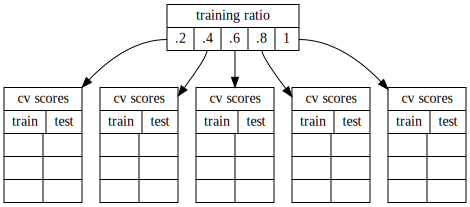

In [2]:
from graphviz import Digraph


s = Digraph('structs', node_attr={'shape': 'record'})

s.node('size', '{ {training ratio} | {<.2> .2|<.4> .4|<.6> .6|<.8> .8|<1> 1} }')
s.node('size.2', '{ {cv scores} | { train | test} |{ | }| { | }| { | }}')
s.node('size.4', '{ {cv scores} | { train | test} |{ | }| { | }| { | }}')
s.node('size.6', '{ {cv scores} | { train | test} |{ | }| { | }| { | }}')
s.node('size.8', '{ {cv scores} | { train | test} |{ | }| { | }| { | }}')
s.node('size1', '{ {cv scores} | { train | test} |{ | }| { | }| { | }}')

s.edges([('size:.2', 'size.2'), ('size:.4', 'size.4'), ('size:.6', 'size.6'), ('size:.8', 'size.8'), ('size:1', 'size1')])
s

If the training sample size is small, error is low on the training set and high on the validation set. This is because the model only has to fit against a small number of datapoints and easily overfits here. In otherwords, the model has an easier time "memorizing" or overfitting to the samples On the other hand, the cross validation set has to validate against the remainder with a model that has only learned from a small number of instances, that isn't enough to generalize towards the data in general.

If the training sample size is high, the error tends to be grow higher for the training model. This is because with more training examples _and_ a proper model, overfitting because less likely because more noisy information needs to be evaluated and optimized with a loss function. Meanwhile, the cross-validation error decreases because the distributions of the training and validation dataset gradually begin to merge and resemble one another more and more.

### What are the Characteristics of an Overfit Model and Why?

In an overfit model, the model is overfit to the training data, so the performance of the testing data _never_ reaches near the performance of the training cv score. So if the training curve has a much better score but testing curve has a lower score, i.e., there are _large gaps_ between two curves. Adding more data will improve the performance of both the training and validation set because a more complex model can always have something more to learn on.

### What are the Characteristics of an Underfit Model and Why?

If two curves are "closer to each other" and both of them but have a low score (high error). Both curves sort of plateau and adding more data does not improve the performance of the model because the model sort of "exhausts" everything it can.

### How can we Identify the Optimial Training Size?

In general, the more data, the better models tend to perform. Still, there are many cases where models will generally plateau and so adding any more training data does not do us any good. In would be infact, a net detriment because you would be handicaping model efficiency without getting any additional performance out of it.

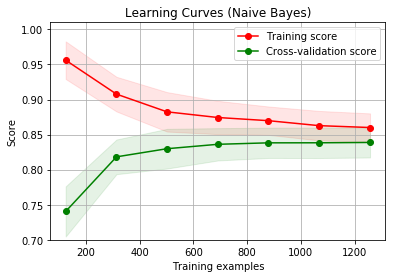

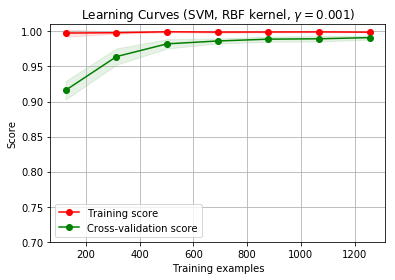

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from myutils.draw.evaluation import plot_learning_curve


digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (Naive Bayes)"
# cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


## Overcoming Overfitting

* **Feed it more data**: A more complex model always has something more to learn from. If more data is available, keep feeding it up the training error begins to contest with the validation error.
* **Bagging** or **Bootstrap Aggregating**: is an ensemble technique that randomly samples from the training data with replacement. On each run (bagging of x amount of training samples), the data is used to train a classification model. Finally, the results are combined via _voting_ across all models to produce a final model for classification.
    * Often used in tree based classification algorithms such as decision tree - which often fall prone to high variance (hence overfitting).
* **Cross validate**: Identify the reservation of data used for test. Cross validation in general provides a more accurate metric on the performance of our model because prediction performance is aggregated across different subsets of data. This means we can use more data in the training set. 
* **Regularization (constrain it)**: L1 or L2. Add an additional regularization term to the cost function to reduce variance.
* _Simply_ the model. Increasing the complexity of the model, just has for example adding a high number polynomial terms in a linear regression model, increases the odds that the model will overfit to the data.
* **Ensemble Learning**: Combine a variately of week models to form a stronger one.
* **Feature Selection**: Select more few features that are _more_ responsible for explaining the cause for variance in the model.
* **Dimensionality Reduction:** Similiar to feature selection, reduce the dimensionality of the data while at the same time minimizing for information loss.

## Overcoming Underfitting

* Adding more example will not nessessarily help. Use a more complex model instead.
* Use better features, or use more features.
* Do not use a model with additional regularization parameters.
